### import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn
import torchvision
from torchvision import models,transforms,datasets
import time
%matplotlib inline
import sys
import os
import shutil
import random

from torch.utils.data import Dataset, DataLoader

/home/hoahoang/env/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")

print('Using gpu: %s ' % torch.cuda.is_available())

Using gpu: True 


In [3]:
%cd /home/hoahoang/training/data/oxford-iiit-pet

/home/hoahoang/training/data/oxford-iiit-pet


### dataprocess

In [4]:
!head annotations/test.txt

Abyssinian_201 1 1 1
Abyssinian_202 1 1 1
Abyssinian_204 1 1 1
Abyssinian_205 1 1 1
Abyssinian_206 1 1 1
Abyssinian_207 1 1 1
Abyssinian_20 1 1 1
Abyssinian_210 1 1 1
Abyssinian_212 1 1 1
Abyssinian_213 1 1 1


In [5]:
!head annotations/trainval.txt

Abyssinian_100 1 1 1
Abyssinian_101 1 1 1
Abyssinian_102 1 1 1
Abyssinian_103 1 1 1
Abyssinian_104 1 1 1
Abyssinian_105 1 1 1
Abyssinian_106 1 1 1
Abyssinian_107 1 1 1
Abyssinian_108 1 1 1
Abyssinian_109 1 1 1


In [6]:
%mkdir test
%mkdir trainval

mkdir: cannot create directory ‘test’: File exists
mkdir: cannot create directory ‘trainval’: File exists


In [7]:
f = os.listdir('./images')

In [8]:
ds_class = []
for i in f:
  i = i.replace("0",'')
  i = i.replace("1",'')
  i = i.replace("2",'')
  i = i.replace("3",'')
  i = i.replace("4",'')
  i = i.replace("5",'')
  i = i.replace("6",'')
  i = i.replace("7",'')
  i = i.replace("8",'')
  i = i.replace("9",'')
  i = i.replace("_.jpg",'')
  if i.count('.mat') > 0:
    continue
  kt =1
  for j in ds_class:
    if i == j:
      kt = 0
  if kt ==1:
    ds_class.append(i)
print(len(ds_class))
print(ds_class)

37
['Siamese', 'staffordshire_bull_terrier', 'havanese', 'Birman', 'japanese_chin', 'miniature_pinscher', 'american_pit_bull_terrier', 'saint_bernard', 'British_Shorthair', 'Persian', 'keeshond', 'yorkshire_terrier', 'Bengal', 'chihuahua', 'pomeranian', 'american_bulldog', 'Abyssinian', 'newfoundland', 'Sphynx', 'Maine_Coon', 'Egyptian_Mau', 'english_cocker_spaniel', 'german_shorthaired', 'english_setter', 'boxer', 'scottish_terrier', 'Russian_Blue', 'Bombay', 'great_pyrenees', 'beagle', 'shiba_inu', 'wheaten_terrier', 'pug', 'Ragdoll', 'leonberger', 'basset_hound', 'samoyed']


In [9]:
%cd /home/hoahoang/training/data/oxford-iiit-pet

/home/hoahoang/training/data/oxford-iiit-pet


In [11]:
# os.mkdir('./trainval')
# os.mkdir('./test')
# for i in ds_class:
#   os.mkdir('./trainval/'+i)
#   os.mkdir('./test/'+i)

In [12]:
print(random.randint(0,2))

1


In [13]:
%cd /home/hoahoang/training/data/oxford-iiit-pet

/home/hoahoang/training/data/oxford-iiit-pet


In [14]:
f = os.listdir('./images')

for j in f:
  i=j
  i = i.replace("0",'')
  i = i.replace("1",'')
  i = i.replace("2",'')
  i = i.replace("3",'')
  i = i.replace("4",'')
  i = i.replace("5",'')
  i = i.replace("6",'')
  i = i.replace("7",'')
  i = i.replace("8",'')
  i = i.replace("9",'')
  i = i.replace("_.jpg",'')
  if i.count('.mat') > 0:
    continue
  if random.randint(1,10)>8:
    shutil.copy('images/'+j,'./test/'+i+'/')
  else:
    shutil.copy('images/'+j,'./trainval/'+i+'/')

In [15]:
with open('./annotations/test.txt') as fp:
    line = fp.readline()
    while line:
        f,_,_,_ = line.split(' ')
        print(f)
        line = fp.readline()
        break

Abyssinian_201


In [16]:
import re
pat = re.compile(r'_\d')
res,_ = pat.split(f)
print(res)

Abyssinian


In [17]:
# create directory if it does not exist
def check_dir(dir_path):
    dir_path = dir_path.replace('//','/')
    os.makedirs(dir_path, exist_ok=True)

In [18]:
%cd ..

/home/hoahoang/training/data


In [19]:
data_dir = './oxford-iiit-pet/'

In [20]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

vgg_format = transforms.Compose([
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                normalize,
            ])

In [21]:
dsets = {x: datasets.ImageFolder(os.path.join(data_dir, x), vgg_format)
         for x in ['test', 'trainval']}

In [22]:
os.path.join(data_dir,'trainval')

'./oxford-iiit-pet/trainval'

In [23]:
dsets['trainval'].classes

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [24]:
dsets['trainval'].class_to_idx

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [25]:
dset_sizes = {x: len(dsets[x]) for x in ['trainval', 'test']}
dset_sizes

{'trainval': 7390, 'test': 5872}

In [26]:
dset_classes = dsets['trainval'].classes

In [27]:
loader_train =  DataLoader(dsets['trainval'], batch_size=32 )
loader_valid = DataLoader(dsets['test'], batch_size=32 )

In [28]:
count = 1
for data in loader_valid:
    print(count, end=',')
    if count == 1:
        inputs_try,labels_try = data
    count += 1

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,

In [29]:
labels_try
inputs_try.shape

torch.Size([32, 3, 224, 224])

In [30]:
def imshow(inp, title=None):
#   Imshow for Tensor.
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = np.clip(std * inp + mean, 0,1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

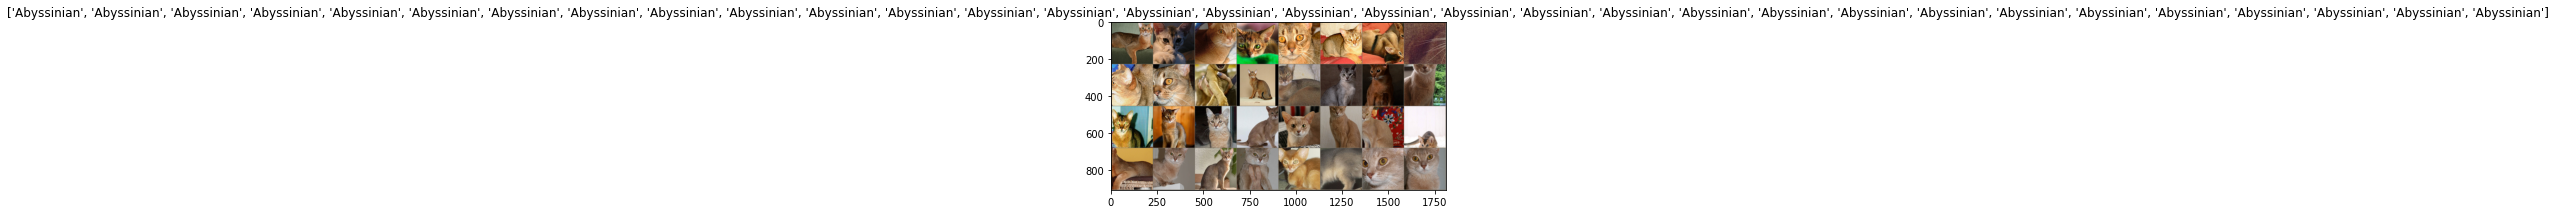

In [31]:
out = torchvision.utils.make_grid(inputs_try)

imshow(out, title=[dset_classes[x] for x in labels_try])

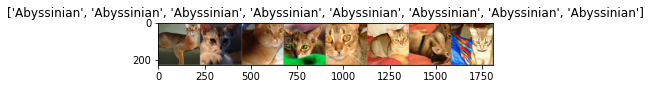

In [49]:
inputs, classes = next(iter(loader_train))

n_images = 8

out = torchvision.utils.make_grid(inputs[0:n_images])

imshow(out, title=[dset_classes[x] for x in classes[0:n_images]])

### VGG model


In [33]:
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")

In [34]:
device = 'cuda:2'

model_vgg = models.vgg16(pretrained=True)
# model_resnet =  models.resnet50(pretrained=True)

In [35]:
inputs_try , labels_try = inputs_try.to(device), labels_try.to(device)

model_vgg = model_vgg.to(device)
outputs_try = model_vgg(inputs_try)


In [36]:
outputs_try
outputs_try.shape

torch.Size([32, 1000])

In [37]:
print(model_vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [38]:
for param in model_vgg.parameters():
    param.requires_grad = False
model_vgg.classifier._modules['6'] = nn.Linear(4096, 37)
model_vgg.classifier._modules['7'] = torch.nn.LogSoftmax(dim = 1)

In [39]:
print(model_vgg.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=37, bias=True)
  (7): LogSoftmax(dim=1)
)


In [40]:
model_vgg = model_vgg.to(device)

In [41]:
criterion = nn.NLLLoss()
lr = 0.001
optimizer_vgg = torch.optim.SGD(model_vgg.classifier[6].parameters(),lr = lr)

In [55]:
### Train
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()
def train_model(model,dataloader,size,epochs=1,optimizer=None):
    model.train()
    
    for epoch in range(epochs):
        running_loss = 0.0
        running_corrects = 0
        for inputs,classes in dataloader:
            inputs = inputs.to(device)
            classes = classes.to(device)
            outputs = model(inputs)
            loss = criterion(outputs,classes)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            _,preds = torch.max(outputs.data,1)
            # statistics
            running_loss += loss.data.item()
            running_corrects += torch.sum(preds == classes.data)
        epoch_loss = running_loss / size
        writer.add_scalar("Loss", epoch_loss, epoch)
        epoch_acc = running_corrects.data.item() / size
        writer.add_scalar("acc", epoch_acc, epoch)
        print('Loss: {:.4f} Acc: {:.4f}'.format(
                     epoch_loss, epoch_acc))

In [56]:
%%time
train_model(model_vgg,loader_train,size=dset_sizes['trainval'],epochs=10,optimizer=optimizer_vgg)

Loss: 0.0081 Acc: 0.9176
Loss: 0.0080 Acc: 0.9222
Loss: 0.0080 Acc: 0.9181
Loss: 0.0080 Acc: 0.9204
Loss: 0.0077 Acc: 0.9223
Loss: 0.0077 Acc: 0.9234
Loss: 0.0077 Acc: 0.9219
Loss: 0.0077 Acc: 0.9222
Loss: 0.0077 Acc: 0.9250
Loss: 0.0076 Acc: 0.9257
CPU times: user 1h 17min 5s, sys: 41.9 s, total: 1h 17min 47s
Wall time: 6min 22s


In [57]:
def test_model(model,dataloader,size):
    model.eval()
    predictions = np.zeros(size)
    all_classes = np.zeros(size)
    all_proba = np.zeros((size,37))
    i = 0
    running_loss = 0.0
    running_corrects = 0
    #print(size)
    for inputs,classes in dataloader:
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        loss = criterion(outputs,classes)           
        _,preds = torch.max(outputs.data,1)
            # statistics
        running_loss += loss.data.item()
        running_corrects += torch.sum(preds == classes.data)
        predictions[i:i+len(classes)] = preds.to('cpu').numpy()
        all_classes[i:i+len(classes)] = classes.to('cpu').numpy()
        all_proba[i:i+len(classes),:] = outputs.data.to('cpu').numpy()
        i += len(classes)
    epoch_loss = running_loss / size
    epoch_acc = running_corrects.data.item() / size
    print('Loss: {:.4f} Acc: {:.4f}'.format(
                     epoch_loss, epoch_acc))
    return predictions, all_proba, all_classes

In [58]:
predictions, all_proba, all_classes = test_model(model_vgg,loader_valid,size=dset_sizes['test'])

Loss: 0.0063 Acc: 0.9404


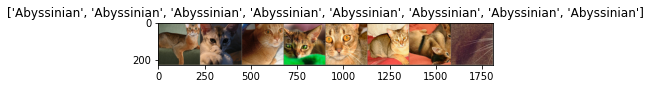

In [59]:
inputs, classes = next(iter(loader_valid))

out = torchvision.utils.make_grid(inputs[0:n_images])

imshow(out, title=[dset_classes[x] for x in classes[0:n_images]])

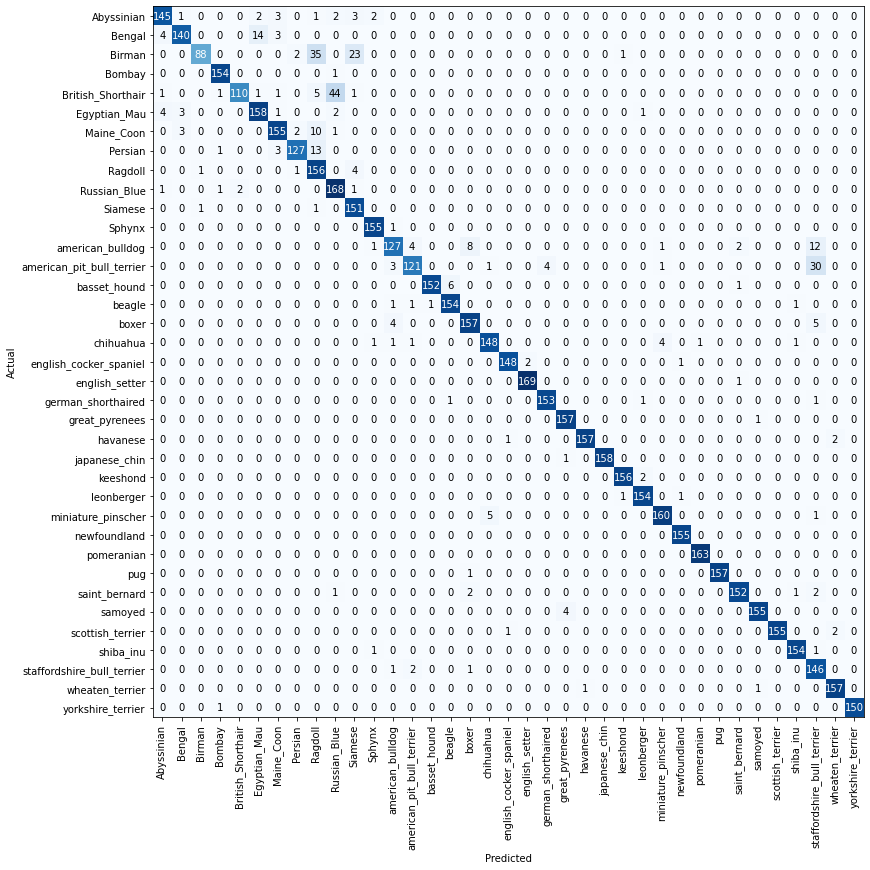

In [60]:
### confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def make_fig_cm(cm):
    fig = plt.figure(figsize=(12,12))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    tick_marks = np.arange(37);
    plt.xticks(tick_marks, dset_classes, rotation=90);
    plt.yticks(tick_marks, dset_classes, rotation=0);
    plt.tight_layout();
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        coeff = f'{cm[i, j]}'
        plt.text(j, i, coeff, horizontalalignment="center", verticalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual');
    plt.xlabel('Predicted');

cm = confusion_matrix(all_classes,predictions)
make_fig_cm(cm)

In [61]:
! tensorboard --logdir=runs --load_fast=false --bind_all

TensorFlow installation not found - running with reduced feature set.
TensorBoard 2.8.0 at http://labserver:6009/ (Press CTRL+C to quit)
^C
